In [1491]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1492]:
from sklearn.linear_model import LogisticRegression

In [1493]:
from sklearn.tree import DecisionTreeClassifier

In [1494]:
from sklearn.ensemble import RandomForestClassifier

In [1495]:
from sklearn.svm import SVC

In [1496]:
from sklearn.neighbors import KNeighborsClassifier

In [1497]:
from sklearn.naive_bayes import GaussianNB

In [1498]:
from sklearn.preprocessing import StandardScaler

In [1499]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report 

In [1500]:
from sklearn.metrics import confusion_matrix

In [1501]:
df=pd.read_csv('winequality.csv')

In [1502]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1503]:
df.shape

(1599, 12)

In [1504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Cleaning

In [1505]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1506]:
# no null values

## EDA

In [1507]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [1508]:
df.groupby('quality')['fixed acidity'].mean().sort_values()

quality
4    7.779245
5    8.167254
6    8.347179
3    8.360000
8    8.566667
7    8.872362
Name: fixed acidity, dtype: float64

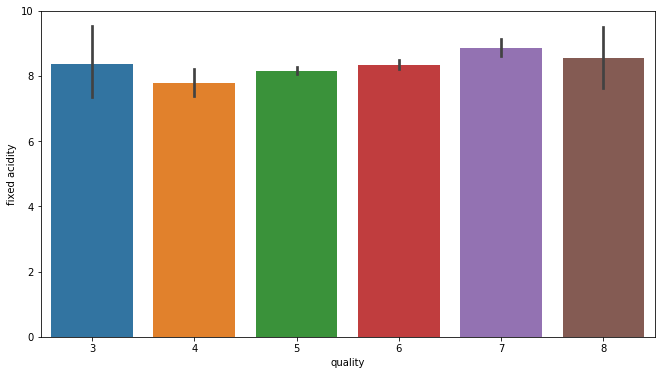

In [1509]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='fixed acidity', data=df)

In [1510]:
df.groupby('quality')['volatile acidity'].mean().sort_values()

quality
7    0.403920
8    0.423333
6    0.497484
5    0.577041
4    0.693962
3    0.884500
Name: volatile acidity, dtype: float64

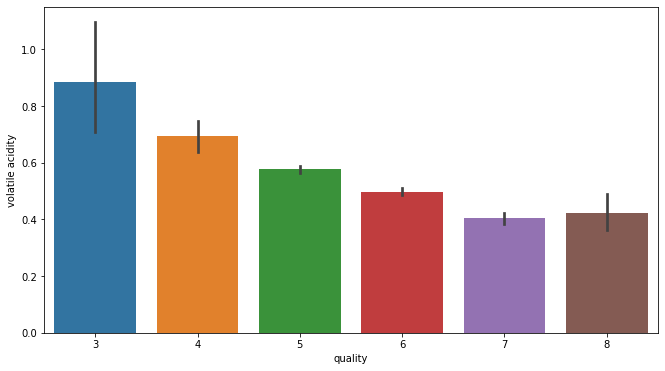

In [1511]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='volatile acidity', data=df)

In [1512]:
df.groupby('quality')['citric acid'].mean().sort_values()

quality
3    0.171000
4    0.174151
5    0.243686
6    0.273824
7    0.375176
8    0.391111
Name: citric acid, dtype: float64

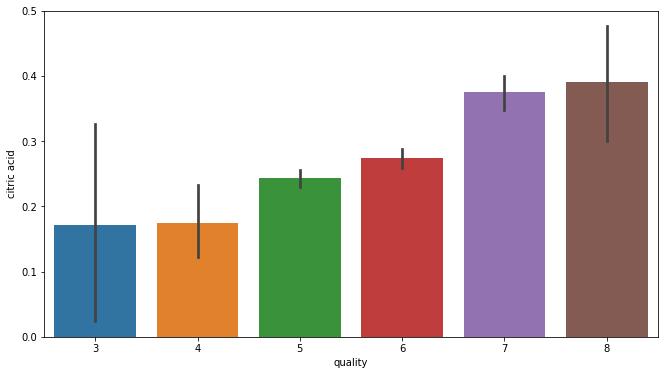

In [1513]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='citric acid', data=df)

In [1514]:
df.groupby('quality')['residual sugar'].mean().sort_values()

quality
6    2.477194
5    2.528855
8    2.577778
3    2.635000
4    2.694340
7    2.720603
Name: residual sugar, dtype: float64

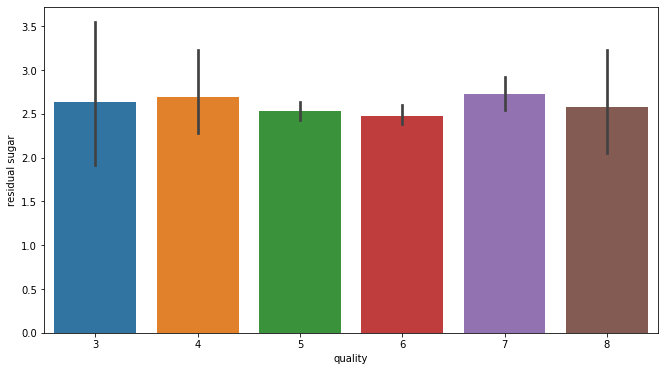

In [1515]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='residual sugar', data=df)

In [1516]:
df.groupby('quality')['chlorides'].mean().sort_values()

quality
8    0.068444
7    0.076588
6    0.084956
4    0.090679
5    0.092736
3    0.122500
Name: chlorides, dtype: float64

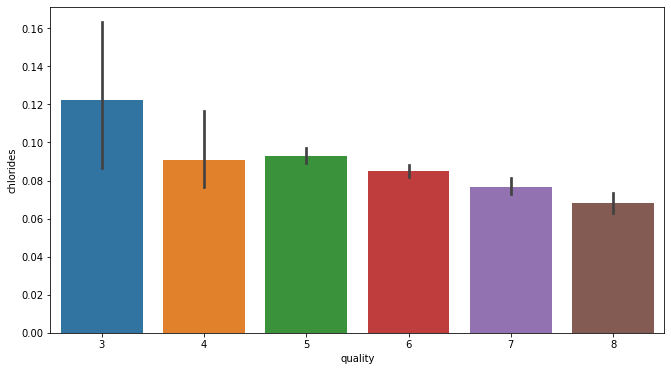

In [1517]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='chlorides', data=df)

In [1518]:
df.groupby('quality')['free sulfur dioxide'].mean().sort_values()

quality
3    11.000000
4    12.264151
8    13.277778
7    14.045226
6    15.711599
5    16.983847
Name: free sulfur dioxide, dtype: float64

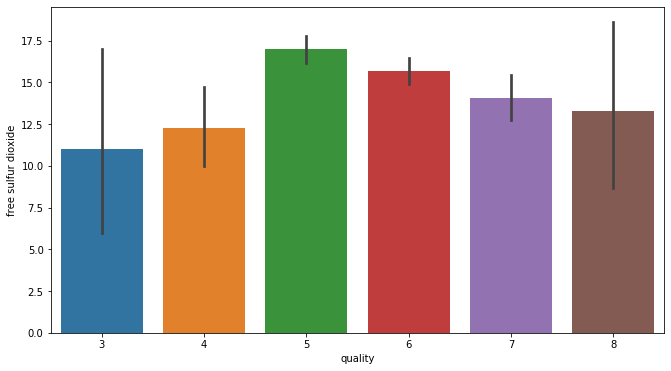

In [1519]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

In [1520]:
df.groupby('quality')['total sulfur dioxide'].mean().sort_values()

quality
3    24.900000
8    33.444444
7    35.020101
4    36.245283
6    40.869906
5    56.513950
Name: total sulfur dioxide, dtype: float64

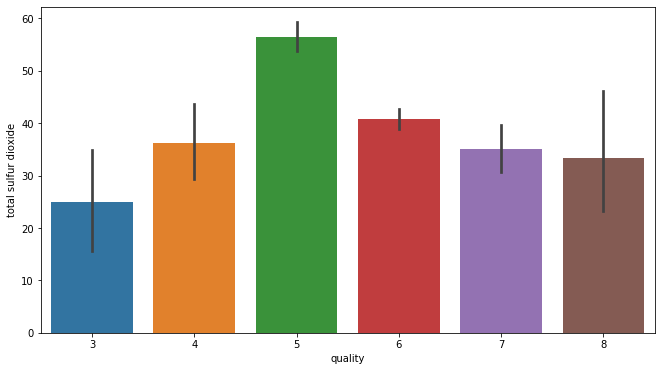

In [1521]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

In [1522]:
df.groupby('quality')['density'].mean().sort_values()

quality
8    0.995212
7    0.996104
4    0.996542
6    0.996615
5    0.997104
3    0.997464
Name: density, dtype: float64

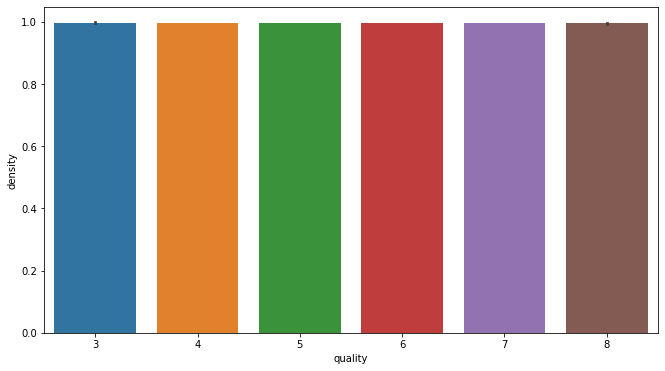

In [1523]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='density', data=df)

In [1524]:
df.groupby('quality')['pH'].mean().sort_values()

quality
8    3.267222
7    3.290754
5    3.304949
6    3.318072
4    3.381509
3    3.398000
Name: pH, dtype: float64

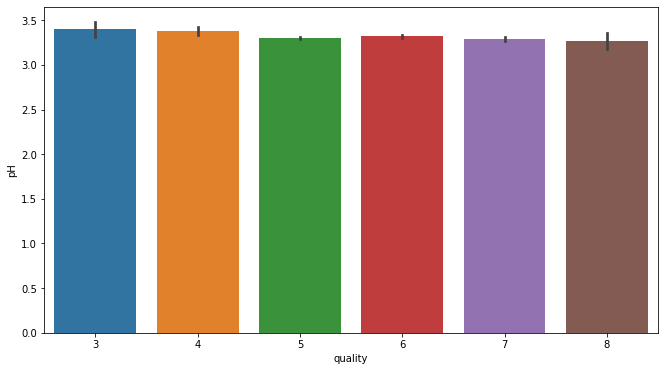

In [1525]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='pH', data=df)

In [1526]:
df.groupby('quality')['sulphates'].mean().sort_values()

quality
3    0.570000
4    0.596415
5    0.620969
6    0.675329
7    0.741256
8    0.767778
Name: sulphates, dtype: float64

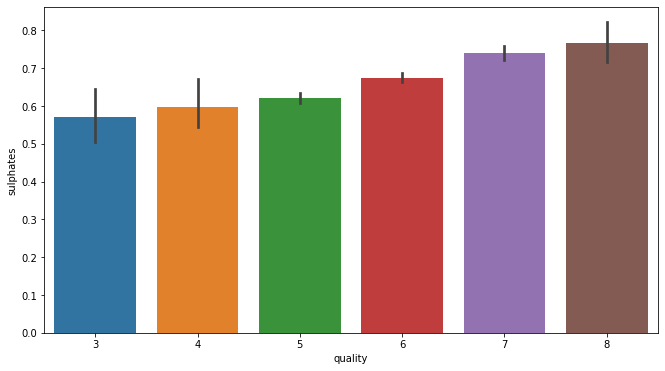

In [1527]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='sulphates', data=df)

In [1528]:
df.groupby('quality')['alcohol'].mean().sort_values()

quality
5     9.899706
3     9.955000
4    10.265094
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

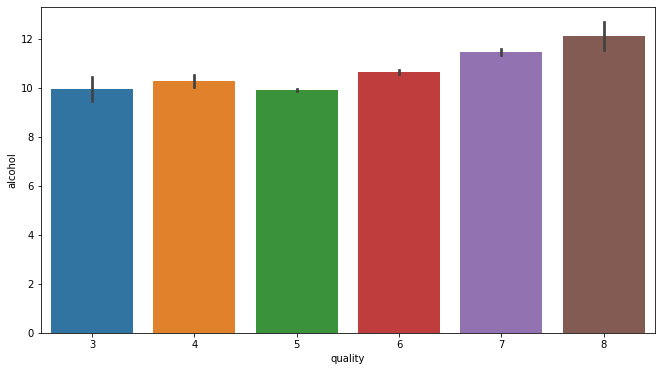

In [1529]:
plt.figure(figsize=(11,6))
sns.barplot(x='quality', y='alcohol', data=df)

In [1530]:
# IT is seen that 7,8 have same features and can be considered as good i.e.(1) and rest as bad i.e.(0)

## Feature Selection

### Checking for correlation 

In [1531]:
corr=df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [1532]:
print(corr['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [1533]:
from sklearn.ensemble import ExtraTreesClassifier

In [1534]:
cr=ExtraTreesClassifier()

In [1535]:
x=df.drop('quality',axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [1536]:
y=df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [1537]:
cr.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [1538]:
print(cr.feature_importances_)

[0.07668641 0.09607988 0.07962685 0.07888973 0.07612228 0.07530105
 0.10202534 0.084464   0.07712756 0.10224154 0.15143535]


In [1539]:
feature_importance=pd.Series(cr.feature_importances_,index=x.columns)
feature_importance.sort_values(ascending=False)

alcohol                 0.151435
sulphates               0.102242
total sulfur dioxide    0.102025
volatile acidity        0.096080
density                 0.084464
citric acid             0.079627
residual sugar          0.078890
pH                      0.077128
fixed acidity           0.076686
chlorides               0.076122
free sulfur dioxide     0.075301
dtype: float64

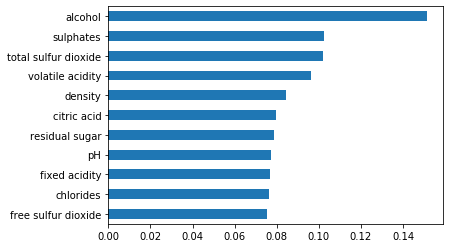

In [1540]:
feature_importance.sort_values(ascending=True).plot(kind='barh')

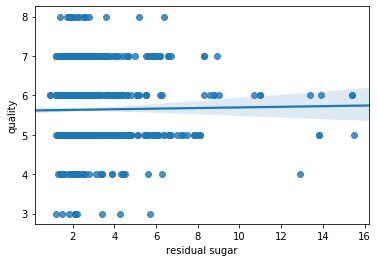

In [1541]:
sns.regplot(x='residual sugar', y='quality' ,data=df)

In [1542]:
# free sulphar dioxide,residual sugar, and ph have least correlation  

In [1543]:
df.drop(['free sulfur dioxide','residual sugar','pH'],inplace=True,axis=1)

In [1544]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


### Changing the value of quality accoriding to EDA

In [1545]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [1546]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [1547]:
def change_quality(x):
    if (x==3 or x==4 or x==5 or x==6):
        return 0
    else:
        return 1

In [1548]:
df['quality']=df['quality'].apply(change_quality)

In [1549]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


In [1550]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Checking For outliers

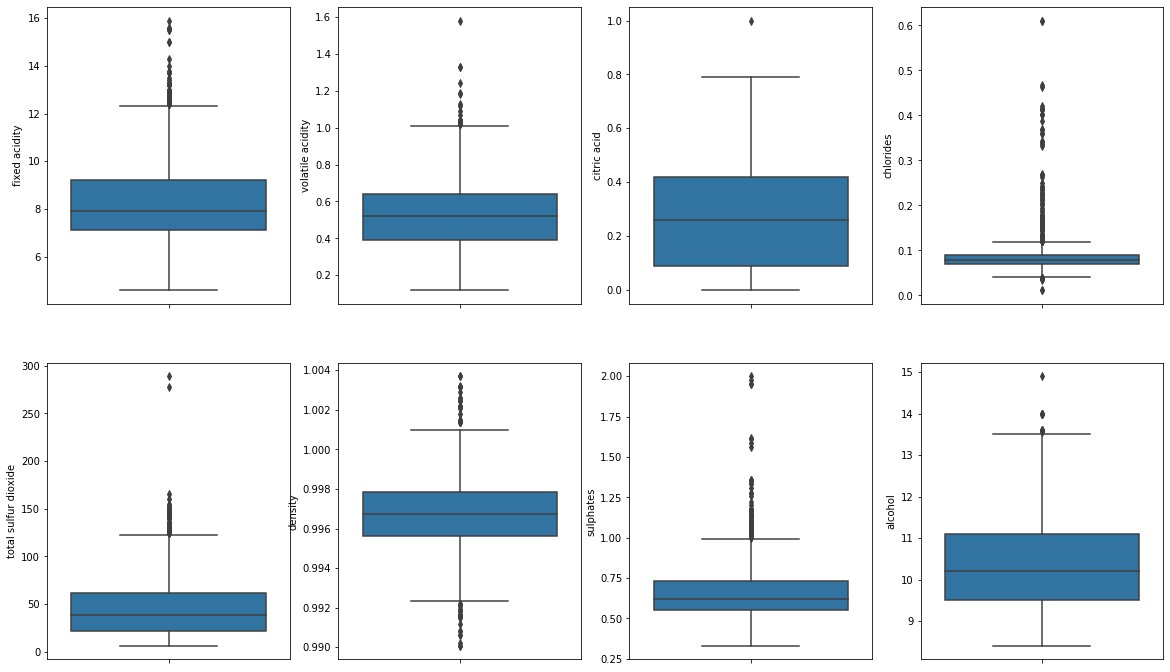

In [1551]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,12))
sns.boxplot(y='fixed acidity',data=df,ax=ax[0][0])
sns.boxplot(y='volatile acidity',data=df,ax=ax[0][1])
sns.boxplot(y='citric acid',data=df,ax=ax[0][2])
sns.boxplot(y='chlorides',data=df,ax=ax[0][3])
sns.boxplot(y='total sulfur dioxide',data=df,ax=ax[1][0])
sns.boxplot(y='density',data=df,ax=ax[1][1])
sns.boxplot(y='sulphates',data=df,ax=ax[1][2])
sns.boxplot(y='alcohol',data=df,ax=ax[1][3])

### Removing Outliers 

In [1552]:
fqt,tqt=np.percentile(df['citric acid'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(1.5*iqr)
print(lb,ub)

-0.4049999999999999 0.9149999999999999


In [1553]:
df.drop(df[df['citric acid']>ub].index,inplace=True)

In [1554]:
fqt,tqt=np.percentile(df['chlorides'],[25,75])
iqr=tqt-fqt
lb=fqt-(1.5*iqr)
ub=tqt+(1.5*iqr)
print(lb,ub)

0.04000000000000002 0.11999999999999998


In [1555]:
df.drop(df[df['chlorides']>0.5].index,inplace=True)

In [1556]:
df.drop(df[df['total sulfur dioxide']>250].index,inplace=True)

In [1557]:
df.drop(df[df['volatile acidity']>1.4].index,inplace=True)

In [1558]:
df.drop(df[df['alcohol']>14].index,inplace=True)

In [1559]:
df.drop(df[df['sulphates']>1.4].index,inplace=True)

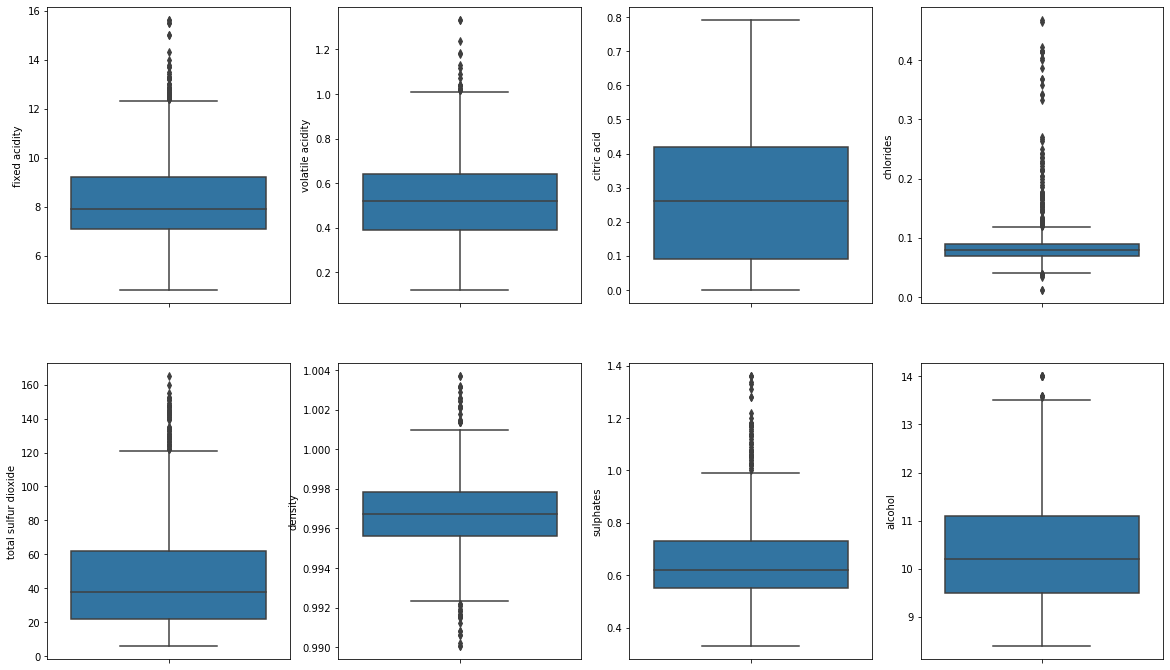

In [1560]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,12))
sns.boxplot(y='fixed acidity',data=df,ax=ax[0][0])
sns.boxplot(y='volatile acidity',data=df,ax=ax[0][1])
sns.boxplot(y='citric acid',data=df,ax=ax[0][2])
sns.boxplot(y='chlorides',data=df,ax=ax[0][3])
sns.boxplot(y='total sulfur dioxide',data=df,ax=ax[1][0])
sns.boxplot(y='density',data=df,ax=ax[1][1])
sns.boxplot(y='sulphates',data=df,ax=ax[1][2])
sns.boxplot(y='alcohol',data=df,ax=ax[1][3])

In [1561]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


### Trying to balance the data set

In [1562]:
df['quality'].value_counts()

0    1371
1     215
Name: quality, dtype: int64

In [1563]:
from imblearn.over_sampling import SMOTE

In [1564]:
x=df.drop('quality',axis=1)
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2


In [1565]:
y=df['quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1586, dtype: int64

In [1566]:
sm = SMOTE(random_state=42)

In [1567]:
x_res, y_res = sm.fit_resample(x, y)

In [1568]:
app=[x_res,y_res]

In [1569]:
df1=pd.concat(app,axis=1)
df1.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


In [1570]:
df1.shape

(2742, 9)

In [1571]:
df1['quality'].value_counts()

1    1371
0    1371
Name: quality, dtype: int64

In [1572]:
df2=df1

In [1573]:
df2.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


In [1574]:
df2.shape

(2742, 9)

In [1575]:
cols=['fixed acidity','volatile acidity','citric acid','total sulfur dioxide','density','sulphates','alcohol']

## Feature Scaling

In [1576]:
sc=StandardScaler()

In [1577]:
df2[cols]=sc.fit_transform(df2[cols])

In [1578]:
df2.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,-0.632065,1.340488,-1.631353,0.076,-0.212723,0.702923,-0.921405,-1.321077,0
1,-0.406718,2.420300,-1.631353,0.098,0.942839,0.182892,-0.072988,-0.960058,0
2,-0.406718,1.700425,-1.421472,0.092,0.487618,0.286898,-0.285092,-0.960058,0
3,1.508732,-1.179076,1.306979,0.075,0.697720,0.806929,-0.780002,-0.960058,0
4,-0.632065,1.340488,-1.631353,0.076,-0.212723,0.702923,-0.921405,-1.321077,0


In [1579]:
x=df2.drop('quality',axis=1)
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,-0.632065,1.340488,-1.631353,0.076000,-0.212723,0.702923,-0.921405,-1.321077
1,-0.406718,2.420300,-1.631353,0.098000,0.942839,0.182892,-0.072988,-0.960058
2,-0.406718,1.700425,-1.421472,0.092000,0.487618,0.286898,-0.285092,-0.960058
3,1.508732,-1.179076,1.306979,0.075000,0.697720,0.806929,-0.780002,-0.960058
4,-0.632065,1.340488,-1.631353,0.076000,-0.212723,0.702923,-0.921405,-1.321077
...,...,...,...,...,...,...,...,...
2737,-0.029959,-1.169295,0.516008,0.049251,-1.053131,-1.202966,0.022439,1.427170
2738,0.536865,-0.772861,0.581818,0.073543,-0.539810,-0.264091,1.419677,0.847062
2739,-0.724922,-0.491516,-0.037630,0.082417,-0.084198,-1.475217,1.142934,2.127468
2740,3.351619,-1.373874,0.874247,0.080800,-0.568866,1.868557,1.070295,-1.316836


In [1580]:
y=df2['quality']
y

0       0
1       0
2       0
3       0
4       0
       ..
2737    1
2738    1
2739    1
2740    1
2741    1
Name: quality, Length: 2742, dtype: int64

## Applying diffrent ML algorithms 

In [1581]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [1582]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## Logistic Regression

In [1583]:
lr=LogisticRegression()

In [1584]:
print(cross_val_score(LogisticRegression(),x,y,cv=cv,scoring='accuracy'))

[0.80558931 0.80801944 0.81409478 0.81409478 0.81287971 0.81773998
 0.79951397 0.80315917 0.80558931 0.79465371]


In [1585]:
print(cross_val_score(LogisticRegression(),x,y,cv=cv,scoring='accuracy').mean())

0.8075334143377887


In [1586]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1587]:
prediction=lr.predict(x_test)


In [1588]:
lr.score(x_train,y_train)

0.8030224075039083

In [1589]:
confusion_matrix(y_test,prediction)

array([[324,  91],
       [ 69, 339]])

In [1590]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       415
           1       0.79      0.83      0.81       408

    accuracy                           0.81       823
   macro avg       0.81      0.81      0.81       823
weighted avg       0.81      0.81      0.81       823



## Support Vector Machine

In [1591]:
print(cross_val_score(SVC(),x,y,cv=cv,scoring='accuracy'))

[0.84325638 0.85662211 0.85540705 0.86755772 0.85297691 0.85297691
 0.84811665 0.84811665 0.83961118 0.84933171]


In [1592]:
print(cross_val_score(SVC(),x,y,cv=cv,scoring='accuracy').mean())

0.8513973268529771


In [1593]:
svc=SVC()

In [1594]:
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [1595]:
prediction=svc.predict(x_test)

In [1596]:
svc.score(x_train,y_train)

0.8660760812923397

In [1597]:
confusion_matrix(y_test,prediction)

array([[330,  85],
       [ 44, 364]])

In [1598]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       415
           1       0.81      0.89      0.85       408

    accuracy                           0.84       823
   macro avg       0.85      0.84      0.84       823
weighted avg       0.85      0.84      0.84       823



## Decision Tree Classifier 

In [1599]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=cv,scoring='accuracy'))

[0.86634265 0.89307412 0.89914945 0.90157959 0.87970838 0.88213852
 0.87484812 0.86877278 0.86998785 0.89307412]


In [1600]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=cv,scoring='accuracy').mean())

0.8823815309842041


In [1601]:
dt=DecisionTreeClassifier()

In [1602]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1603]:
prediction=dt.predict(x_test)

In [1604]:
dt.score(x_train,y_train)

1.0

In [1605]:
confusion_matrix(y_test,prediction)

array([[351,  64],
       [ 45, 363]])

In [1606]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       415
           1       0.85      0.89      0.87       408

    accuracy                           0.87       823
   macro avg       0.87      0.87      0.87       823
weighted avg       0.87      0.87      0.87       823



## Random Forest Classifier

In [1607]:
rf=RandomForestClassifier()

In [1608]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=cv,scoring='accuracy'))

[0.93074119 0.93803159 0.92709599 0.92345079 0.91980559 0.91980559
 0.93681652 0.91494532 0.92588092 0.91980559]


In [1609]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=cv,scoring='accuracy').mean())

0.9286755771567435


In [1610]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1611]:
prediction=rf.predict(x_test)

In [1612]:
rf.score(x_train,y_train)

1.0

In [1613]:
confusion_matrix(y_test,prediction)

array([[376,  39],
       [ 15, 393]])

In [1614]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       415
           1       0.91      0.96      0.94       408

    accuracy                           0.93       823
   macro avg       0.94      0.93      0.93       823
weighted avg       0.94      0.93      0.93       823



## K Neighbors Classifier 

In [1615]:
knn=KNeighborsClassifier(n_neighbors=3)

In [1616]:
print(cross_val_score(KNeighborsClassifier(n_neighbors=3),x,y,cv=cv,scoring='accuracy'))

[0.89550425 0.88335358 0.90036452 0.88942892 0.90157959 0.88092345
 0.88213852 0.89185905 0.89185905 0.87970838]


In [1617]:
print(cross_val_score(KNeighborsClassifier(n_neighbors=3),x,y,cv=cv,scoring='accuracy').mean())

0.8896719319562576


In [1618]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [1619]:
prediction=knn.predict(x_test)

In [1620]:
confusion_matrix(y_test,prediction)

array([[341,  74],
       [ 12, 396]])

In [1621]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       415
           1       0.84      0.97      0.90       408

    accuracy                           0.90       823
   macro avg       0.90      0.90      0.90       823
weighted avg       0.90      0.90      0.89       823



## Naive Bayes Classifier

In [1622]:
nb=GaussianNB()

In [1623]:
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [1624]:
prediction=nb.predict(x_test)

In [1625]:
nb.score(x_train,y_train)

0.8056279312141741

In [1626]:
confusion_matrix(y_test,prediction)

array([[303, 112],
       [ 65, 343]])

In [1627]:
 print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       415
           1       0.75      0.84      0.79       408

    accuracy                           0.78       823
   macro avg       0.79      0.79      0.78       823
weighted avg       0.79      0.78      0.78       823



In [1628]:
print(cross_val_score(nb,x,y,cv=cv,scoring='accuracy'))

[0.78493317 0.79829891 0.81409478 0.80680437 0.81044957 0.7873633
 0.80437424 0.80437424 0.7837181  0.78979344]


In [1629]:
print(cross_val_score(nb,x,y,cv=cv,scoring='accuracy').mean())

0.7984204131227218


# Random Forest Classifier gives the best accuracy i.e 92%

# Min acc=91% and Max acc=93%